### SciPy Package

사이파이(SciPy)는 수치해석기능을 제공하는 파이썬 패키지다. 여러 서브패키지로 구성되어 있는데 그중 stats 서브패키지는 확률분포 분석을 위한 다양한 기능을 제공한다.

In [1]:
import scipy as sp
import scipy.stats

### 확률분포 클래스

SciPy 에서 확률분포 기능을 사용하려면 우선 해당 확률분포에 대한 확률분포 클래스 객체를 생성한 후에 이 객체의 메서드를 호출해야 한다.

확률분포 객체를 생성하는 명령에는 다음과 같은 것들이 있다.

이 명령들은 모두 stats 서브패키지에 포함되어 있다. 예를 들어 정규분포 객체는 다음과 같이 생성한다.

In [2]:
rv = sp.stats.norm()

### 모수 지정

확률분포 객체를 생성할 때는 분포의 형상을 구체적으로 지정하는 모수(parameter)를 인수로 지정한다. 각 확률분포마다 지정해야 하는 모수 종류가 다르므로 자세한 설명은 사이파이 문서를 참조하여야 한다. 하지만 대부분 다음과 같은 모수들을 공통적으로 가진다.

+ loc	:      일반적으로 분포의 기댓값
+ scale	 :  일반적으로 분포의 표준편차

예를 들어 기댓값이 1이고 표준 편차가 2인 정규분포 객체는 다음과 같이 생성한다.

In [4]:
rv = sp.stats.norm(loc=1, scale=2)

### 확률분포 메서드

확률분포 객체가 가지는 메서드는 다음과 같다.



메서드 사용법은 다음과 같다.

#### 확률밀도함수

In [5]:
import matplotlib.pylab as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 13

path = "/Library/Fonts/NanumGothic.otf"
font_name = fm.FontProperties(fname=path, size=20).get_name()

plt.rc('font', family=font_name)

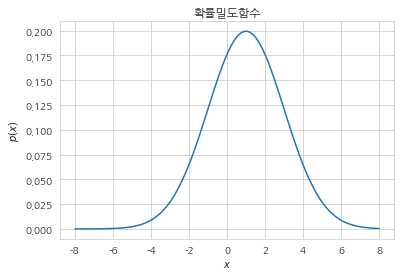

In [6]:
xx = np.linspace(-8, 8, 100)
pdf = rv.pdf(xx)
plt.plot(xx, pdf)
plt.title("확률밀도함수")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

### Practice 1
(1) 기댓값이 0이고 표준 편차가 0.1인 정규분포의 객체를 만들고 확률밀도함수를 그려라.

(2) 이 확률밀도함수의 최대값은 얼마인가?

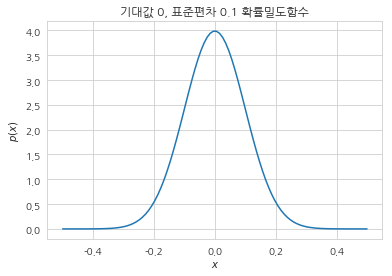

In [12]:
rv = sp.stats.norm(loc=0, scale=0.1)

xx = np.linspace(-0.5, 0.5, 100)
pdf = rv.pdf(xx)
plt.plot(xx, pdf)
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.title("기대값 0, 표준편차 0.1 확률밀도함수")
plt.show()

In [15]:
# 최대값은 x=0.0 p(x) = 3.98....

3.9843380169134646

### 누적분포함수

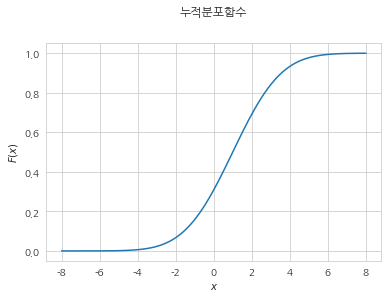

In [17]:
xx = np.linspace(-8, 8, 100)
rv = sp.stats.norm(loc=1, scale=2)
cdf = rv.cdf(xx)
plt.plot(xx, cdf)
plt.title("누적분포함수", y=1.1)
plt.xlabel("$x$")
plt.ylabel("$F(x)$")
plt.show()

### 무작위 표본 생성

무작위로 표본을 만들 때는 rvs(random value sampling) 메서드를 사용한다. 이 메서드에서 받는 인수는 다음과 같다.

+ size	  :       표본 생성 시 생성될 표본 크기
+ random_state :	 표본 생성 시 사용되는 시드(seed)값

In [18]:
rv.rvs(size=(3, 5), random_state=0)

array([[ 4.52810469,  1.80031442,  2.95747597,  5.4817864 ,  4.73511598],
       [-0.95455576,  2.90017684,  0.69728558,  0.7935623 ,  1.821197  ],
       [ 1.28808714,  3.90854701,  2.52207545,  1.24335003,  1.88772647]])

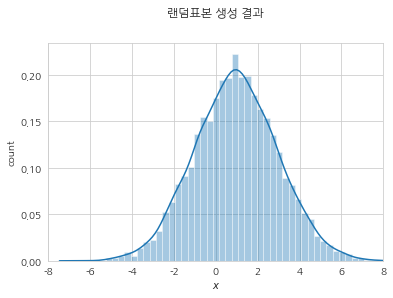

In [20]:
sns.distplot(rv.rvs(size=10000, random_state=0))
plt.title("랜덤표본 생성 결과", y=1.1)
plt.xlabel("$x$")
plt.ylabel("count")
plt.xlim(-8, 8)
plt.show()

### Practice 2

rvs 명령으로 N개의 정규분포의 표본 데이터를 생성하고 이 표본 데이터로부터 표본평균과 비편향 표본분산을 계산하라. 이 값이 인수로 넣은 기댓값과 분산과 비슷한지 비교하라.

1. 𝑁 =10인 경우
2. 𝑁 =10000인 경우

In [21]:
X1 = rv.rvs(size=10, random_state=0)
X2 = rv.rvs(size=10000, random_state=0)

In [22]:
X1.mean(), X1.var(ddof=1)

(2.476046341457669, 4.156632002223484)

In [23]:
X2.mean(), X2.var(ddof=1)

(0.9631325596834683, 3.901462047595947)

### 새로운 확률변수의 시뮬레이션

시뮬레이션 기능을 사용하면 확률변수의 표본을 가공하여 만들어진 새로운 확률변수의 확률분포도 알 수 있다. 예를 들어 0과 1사이의 균일분포를 가지는 확률변수에서 두 개의 표본값을 생성하여 이 두 값을 합한다면 결과는 어떤 분포를 가질까? 얼핏 생각하듯이 균일분포에서 나온 두 개 표본값의 합은 균일분포가 되지 않는다. 시뮬레이션으로 확인하면 1에서 최빈값을 가지는 삼각형 모양의 분포가 된다는 것을 알 수 있다.

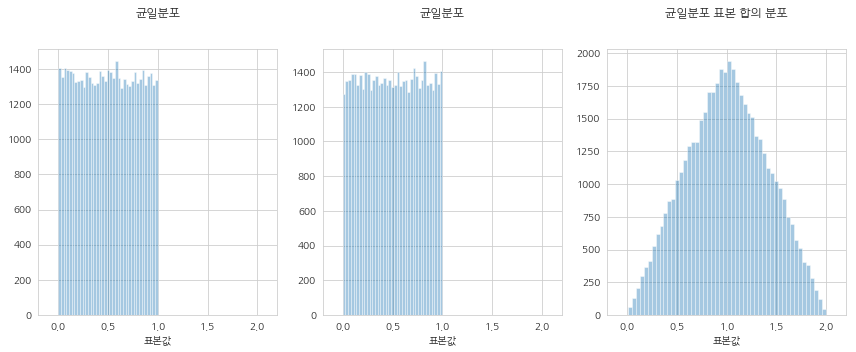

In [30]:
rv1 = sp.stats.uniform()  # 0~1 사이의 균일분포를 가지는 확률변수 생성
rv2 = sp.stats.uniform()

np.random.seed(0)
N = 50000
x_1 = rv1.rvs(N)
x_2 = rv2.rvs(N)
x_3 = x_1 + x_2

plt.figure(figsize=(12, 5))
plt.subplot(131)
sns.distplot(x_1, kde=False)
plt.title("균일분포", y=1.1)
plt.xlabel("표본값")
plt.xlim(-0.2, 2.2)

plt.subplot(132)
sns.distplot(x_2, kde=False)
plt.title("균일분포", y=1.1)
plt.xlabel("표본값")
plt.xlim(-0.2, 2.2)

plt.subplot(133)
sns.distplot(x_3, kde=False)
plt.title("균일분포 표본 합의 분포", y=1.1)
plt.xlabel("표본값")
plt.xlim(-0.2, 2.2)

plt.tight_layout()
plt.show()

### Practice 3

균일분포 확률분포에서 두 개가 아닌 10개 표본값을 생성하여 그 값의 합을 구하면 어떤 모양의 분포를 이루는지 시뮬레이션 기능을 사용하여 구하라.

In [42]:
X = np.zeros(N)

for i in range(10):
    rv3 = sp.stats.uniform()
    X += rv3.rvs(N)

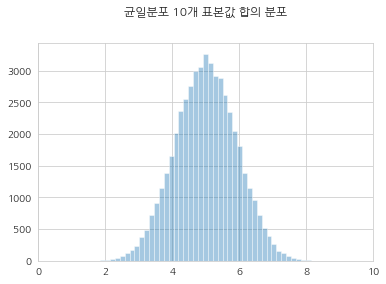

In [47]:
sns.distplot(X, kde=False)
plt.title("균일분포 10개 표본값 합의 분포", y=1.1)
plt.xlim(0, 10)
plt.show()

In [53]:
## 정규분포에 가까운 분포를 이룸. 평균 5를 중심으로...

X.mean(), X.var(ddof=1), X.std()

(4.995326977270147, 0.8300825259066392, 0.9110795378319727)